<a href="https://colab.research.google.com/github/RichardKameri/Ml1/blob/main/wildblueberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('/content/WildBlueberryPollinationSimulationData.csv')

In [3]:
# shape of the data
df.shape

(777, 18)

In [4]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [5]:
# remove the first column
df = df.iloc[:,1:]

In [6]:
# describe the dataset
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [7]:
# dataframe correlation
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892
MaxOfUpperTRange,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075
MinOfUpperTRange,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883
AverageOfUpperTRange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
MaxOfLowerTRange,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439
MinOfLowerTRange,0.033768,0.026104,-0.016801,-0.025623,-0.056546,0.998842,0.996267,0.999944,0.998071,1.000000,0.999787,-0.002403,-0.004334,-0.126788,0.062093,-0.030727,-0.183339


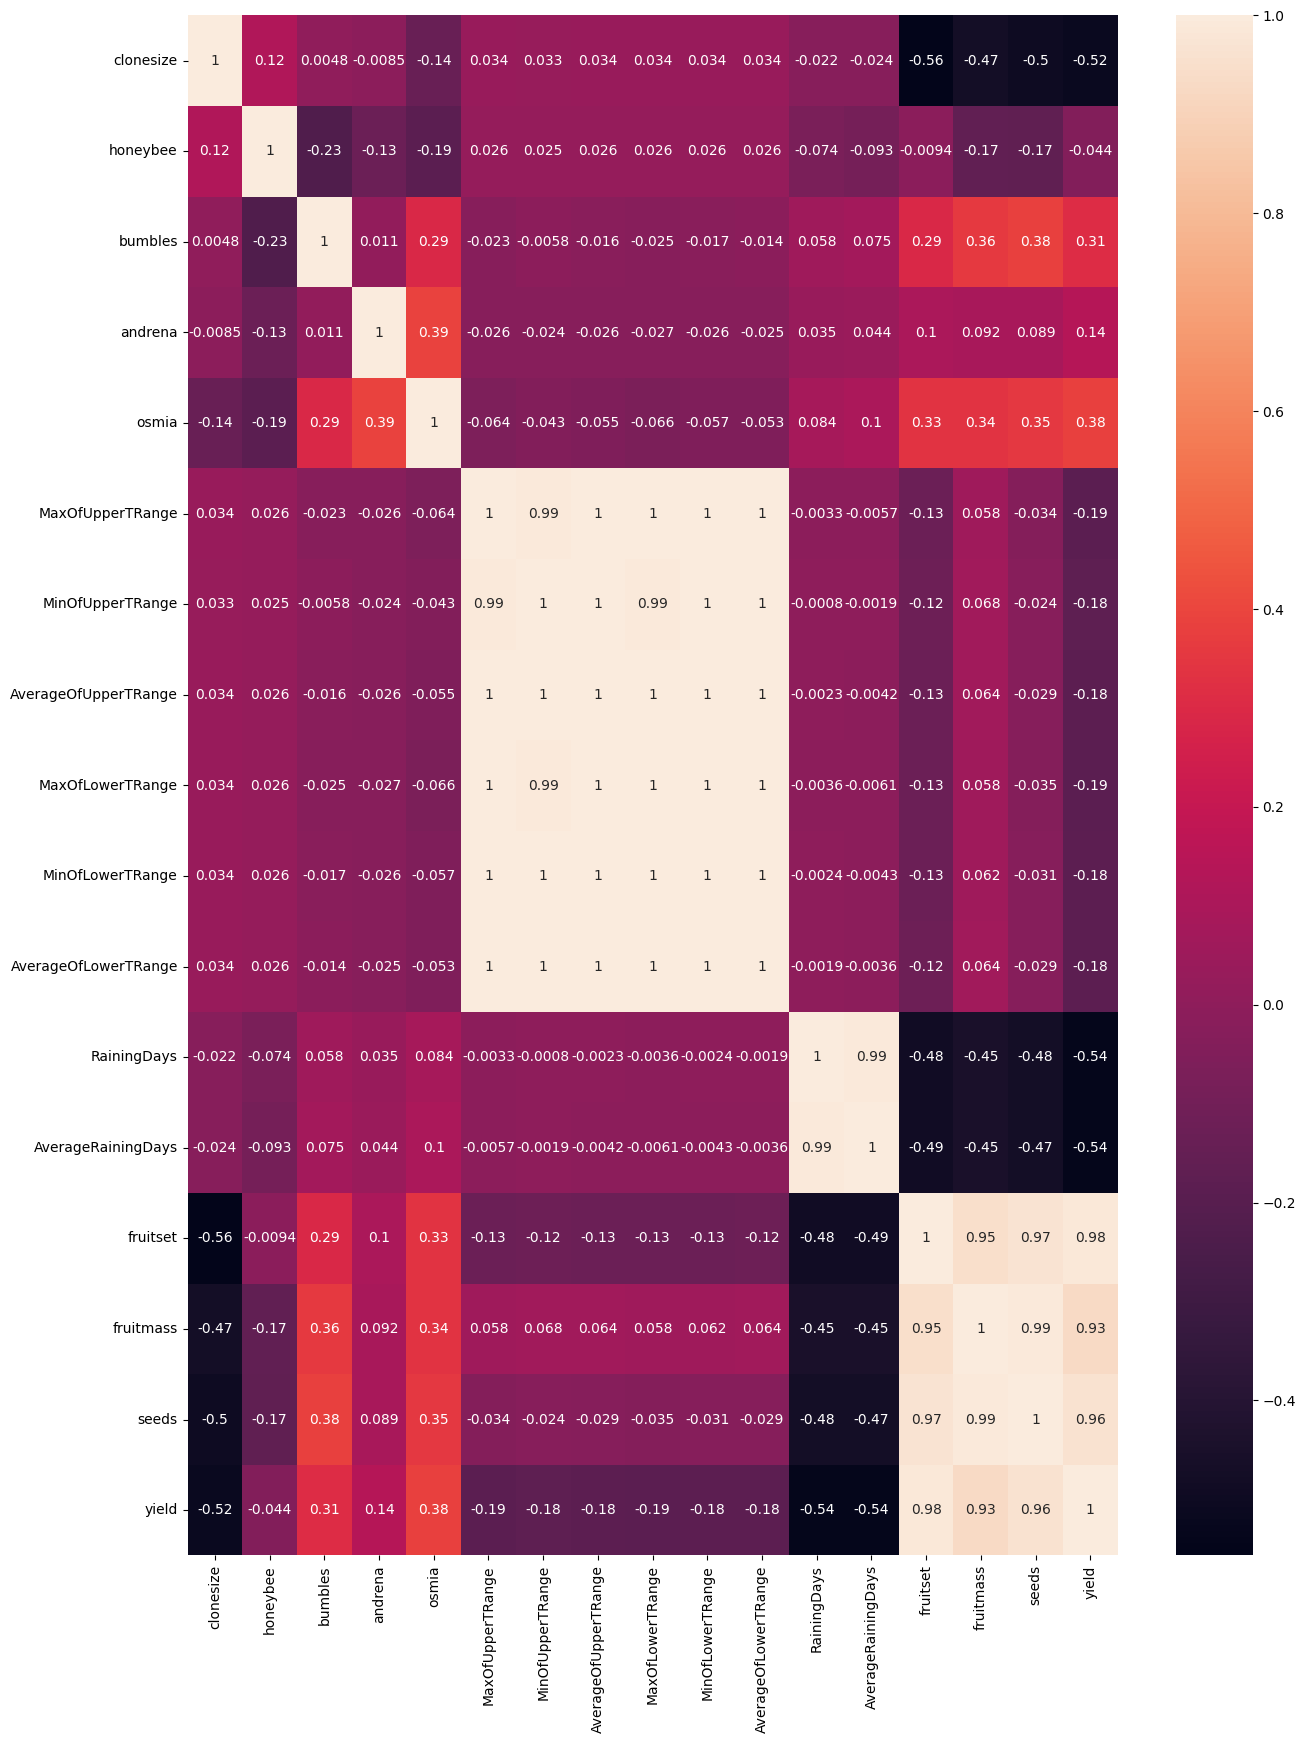

In [8]:
# datafframe correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Explore presecence of outliers
Unitvariate analysis of all the numerical variables - we are trying to see if there are outliers.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_b

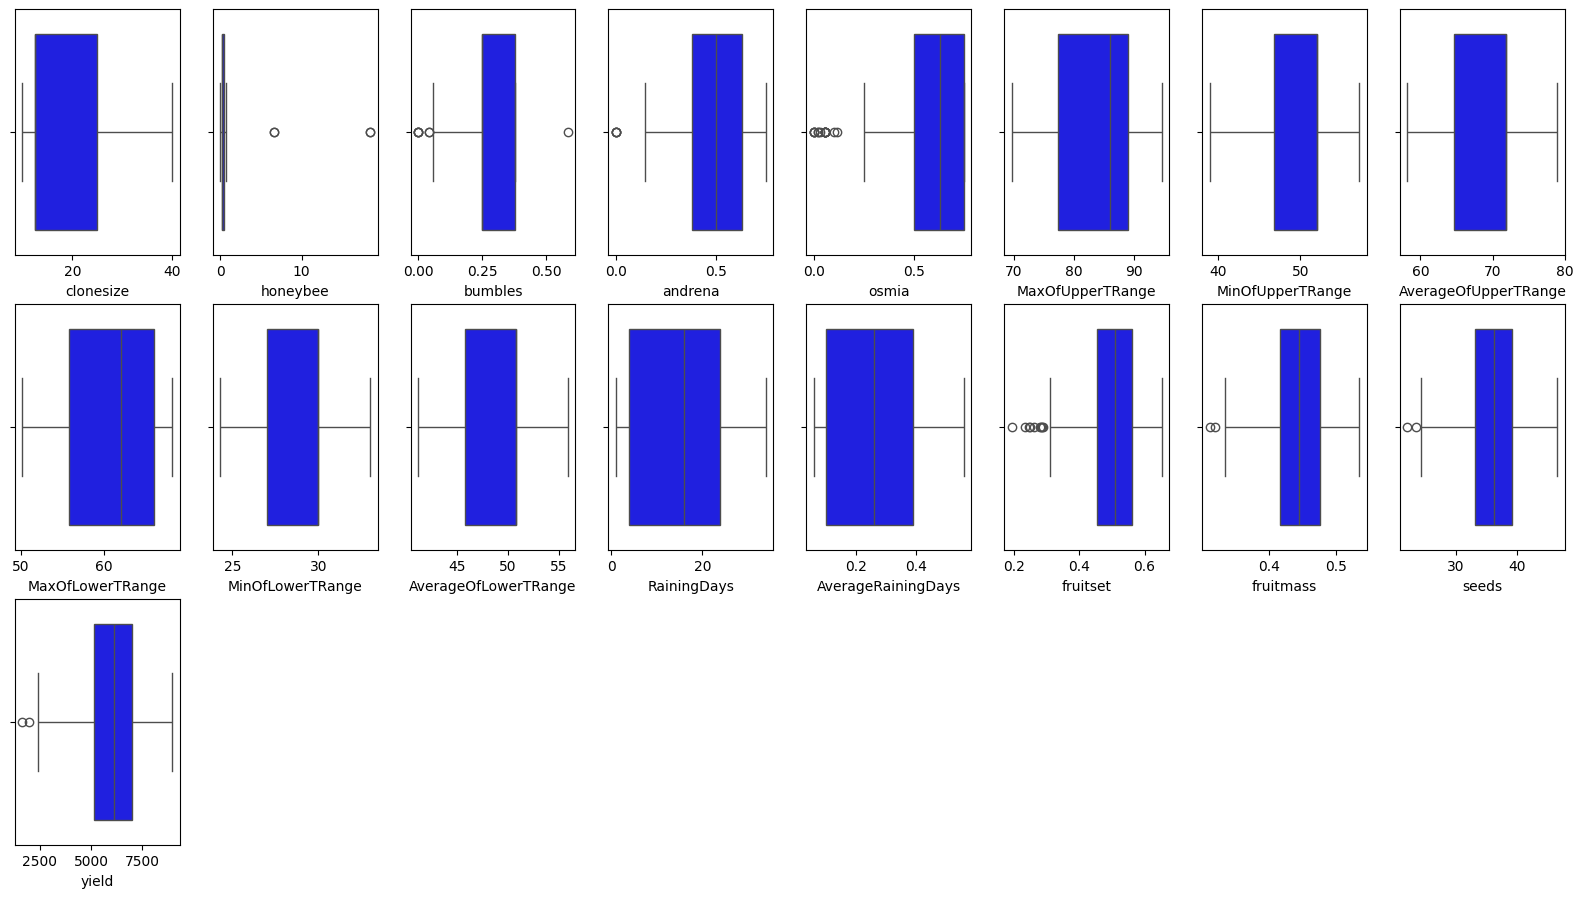

In [9]:
# Explore presecence of outliers Unitvariate analysis of all the numerical variables - we are trying to see if there are outliers.
fig = plt.figure(figsize=(20,30))
# Get numerical features from the DataFrame 'df'
num_var = df.select_dtypes(include=np.number) # Assign numerical columns to 'num_var'
for i,j in zip(num_var,range(len(num_var.columns))):
 ax = fig.add_subplot(8,8, j+1)
 sns.boxplot(data=df,x=df[i],orient='v',color="Blue")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_b

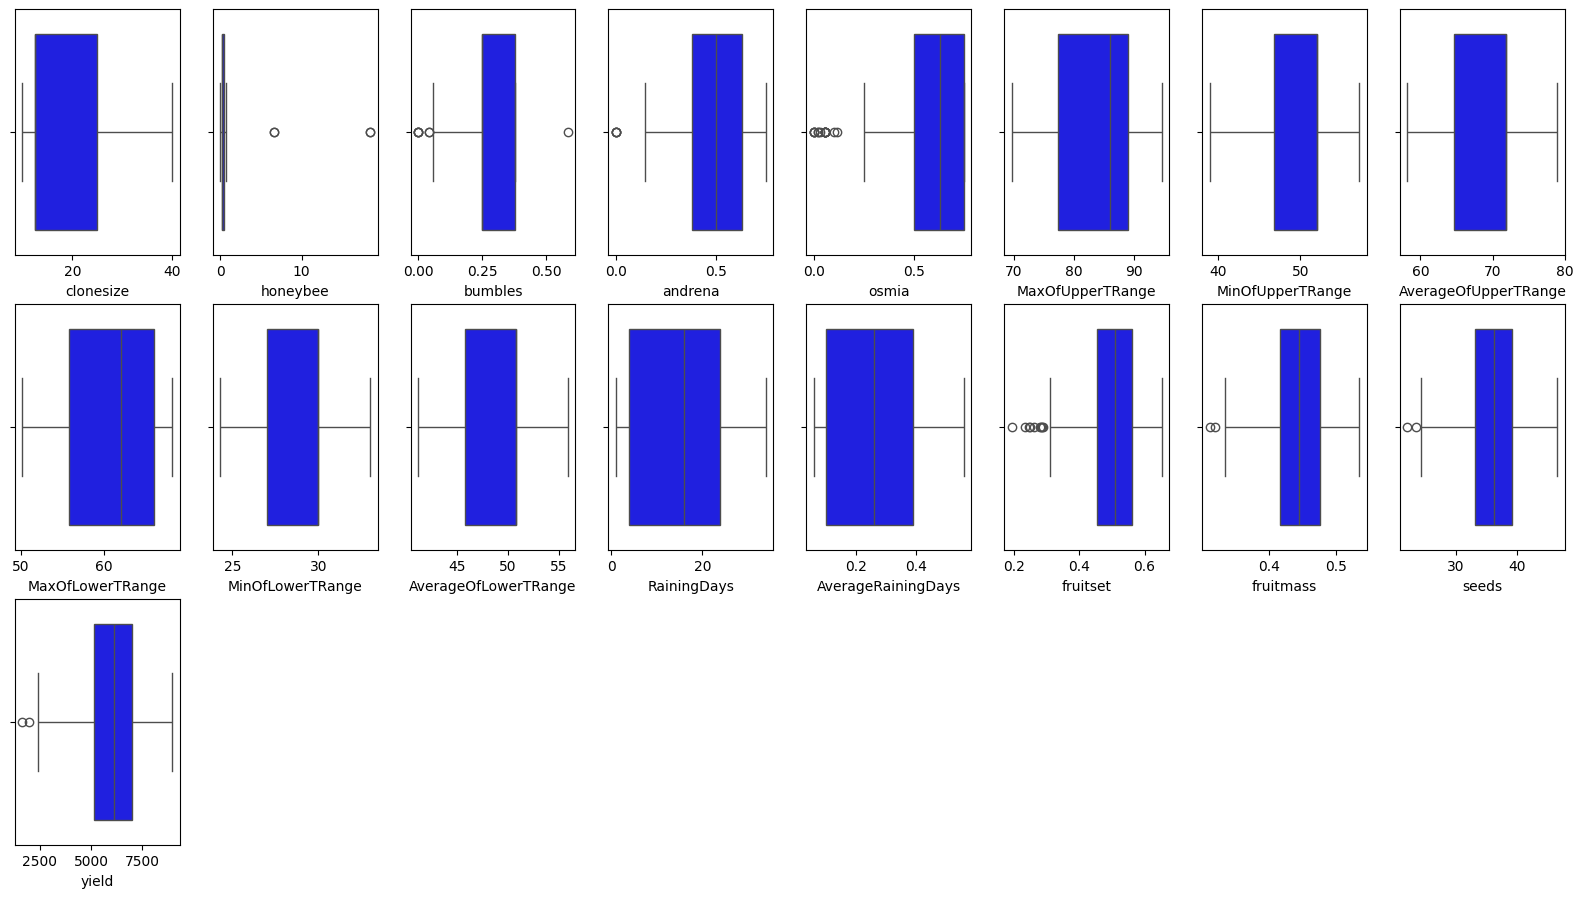

In [10]:
fig = plt.figure(figsize=(20,30))
for i,j in zip(num_var,range(len(num_var.columns))):
 ax = fig.add_subplot(8,8, j+1)
 sns.boxplot(data=df,x=df[i],orient='v',color="Blue")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_b

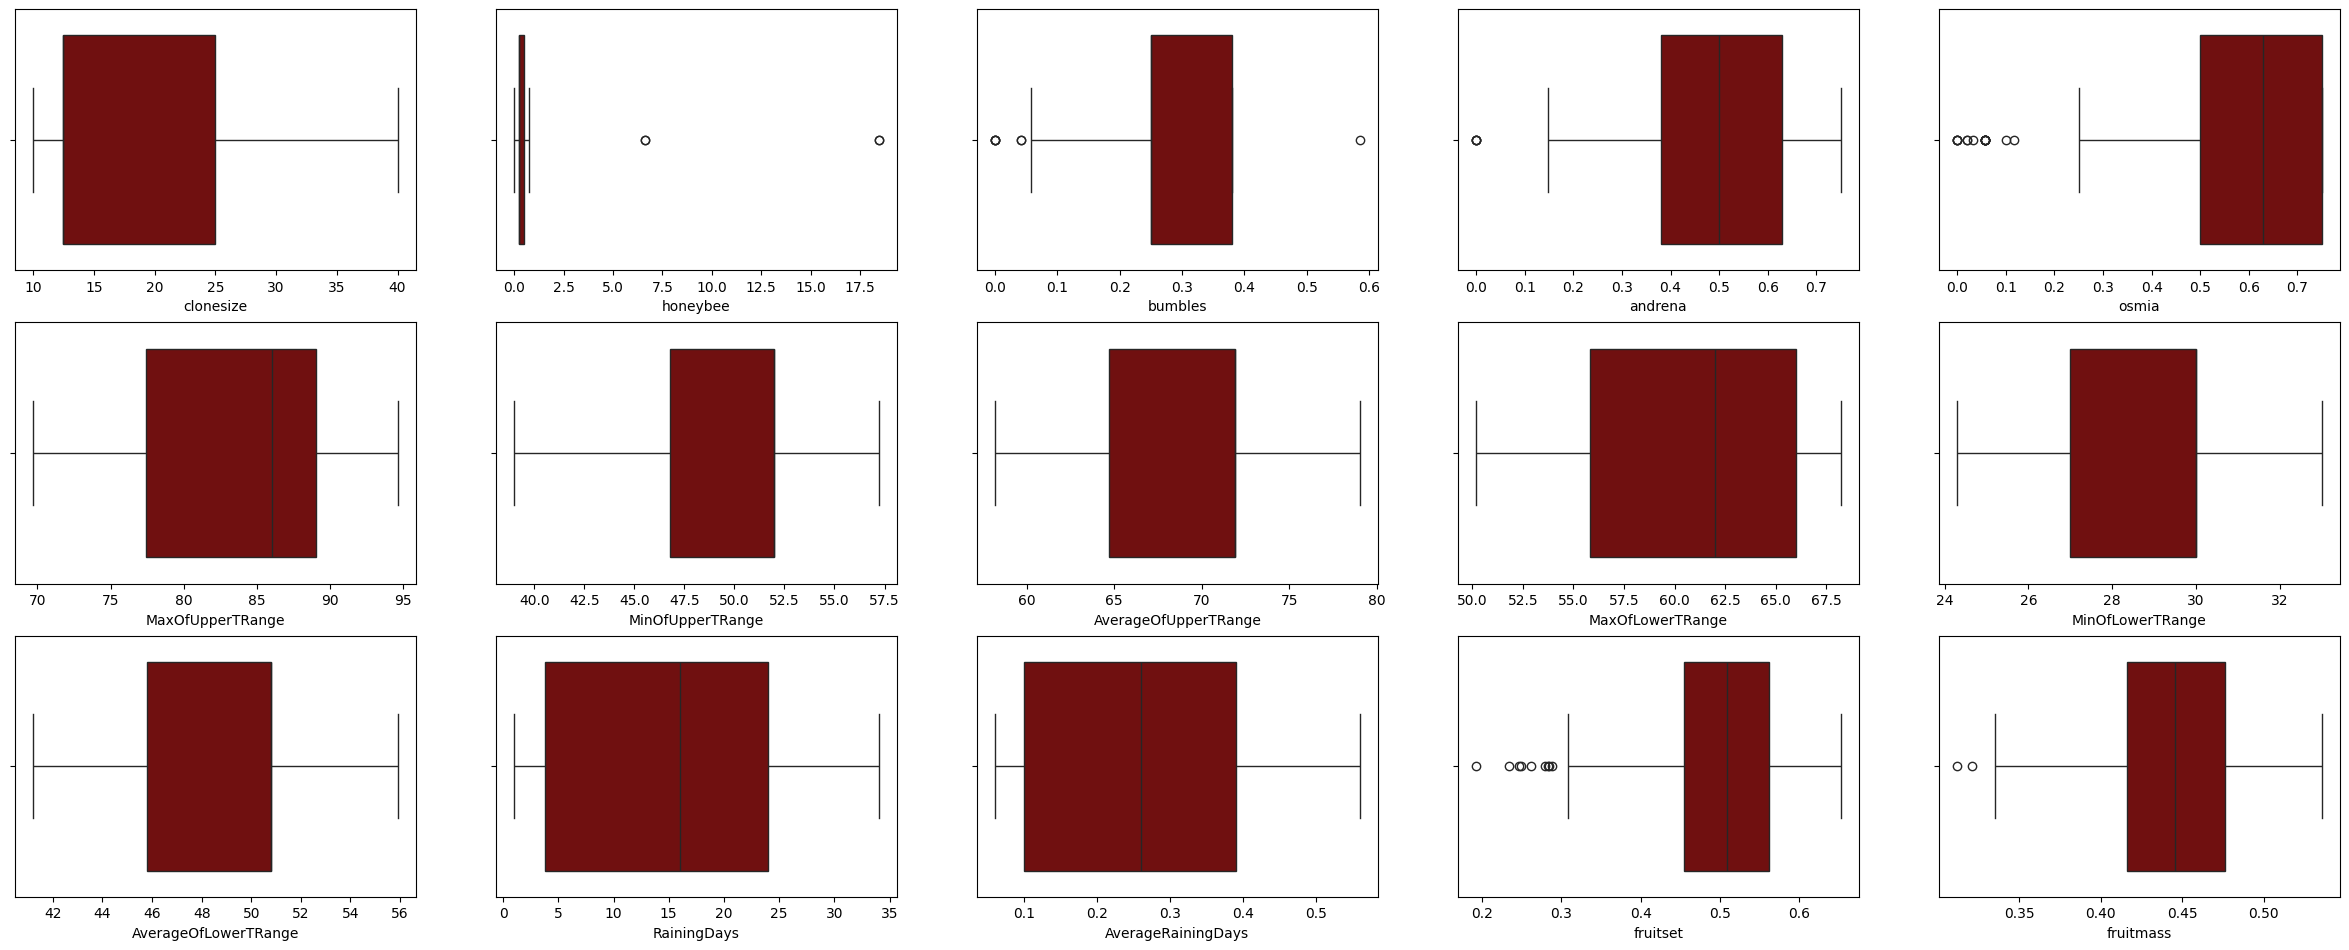

In [11]:
fig = plt.figure(figsize=(30,40))
for i,j in zip(num_var,range(15)):
 ax = fig.add_subplot(10,5, j+1)
 sns.boxplot(data=df,x=df[i],orient='v',color="Maroon") # Changed 'data' to 'df'

In [12]:
# Split the data into features (X) and target variable (y)
X = df.drop("yield", axis=1)  # Features
y = df["yield"]  # Target variable

pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
scores = cross_val_score(pipe, X, y, cv=10, scoring='r2')

print(scores, scores.mean())

[-6.48904836e+11  9.61609478e-01  9.86298771e-01  9.80102657e-01
  9.60218561e-01  9.85166436e-01  9.51223979e-01  9.43813556e-01
  9.64251106e-01 -1.04050820e+23] -1.0405082030693128e+22


In [19]:
# Split the data into features (X) and target variable (y)
X = df.drop("yield", axis=1)  # Features
y = df["yield"]  # Target variable

pipe = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=100))
scores = cross_val_score(pipe, X, y, cv=10, scoring='r2')

print(scores, scores.mean())

[ 0.97982173  0.995112    0.99384269  0.99129909  0.99258008  0.99346209
  0.98323855  0.97068399  0.9797724  -9.32931908] -0.044950646111759876


In [20]:
# use lasso regrresion
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
model = Lasso(alpha=100)
scores = cross_val_score(model, X, y, cv=10, scoring='r2')

print(scores, scores.mean())

[0.84965453 0.97261368 0.98686165 0.97046713 0.97958114 0.99080016
 0.97211049 0.9236786  0.95074145 0.8152565 ] 0.9411765336285759


In [21]:
# use elastic net
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
model = ElasticNet(alpha=100, l1_ratio=0.5)
scores = cross_val_score(model, X, y, cv=10, scoring='r2')

print(scores, scores.mean())

[-0.03269844  0.67721784  0.68300975  0.55049973  0.42064686  0.40431163
  0.62379272  0.71836035  0.73008867  0.33265527] 0.5107884379751022


In [14]:
model = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(model, X, y, cv=10, scoring='r2')

print(scores, scores.mean())

[0.96246774 0.99030886 0.98874806 0.98625885 0.98637183 0.98496039
 0.96686445 0.95060938 0.96682444 0.95638324] 0.9739797230916107


In [15]:
# Extract features and target
X = df.drop("yield", axis = 1)
Y = df["yield"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [16]:
regLR = LinearRegression()
regLR.fit(X_train,Y_train)
yPredRegLR=regLR.predict(X_test)
mean_squared_error(yPredRegLR, Y_test)

11559.011624670802

In [17]:
# Import necessary libraries
from sklearn.kernel_ridge import KernelRidge # Importing the KernelRidge class
from sklearn.model_selection import cross_val_score
# ... (Rest of the code)

model = KernelRidge(alpha=1, kernel='poly', degree=2)
scores = cross_val_score(model, X, y, cv=10, scoring='r2')

print(scores, scores.mean())



[  0.9807154    0.99510736   0.99400799   0.99101396   0.99262897
   0.99398833   0.98353155   0.96988139   0.97937292 -12.0805576 ] -0.3200309714406


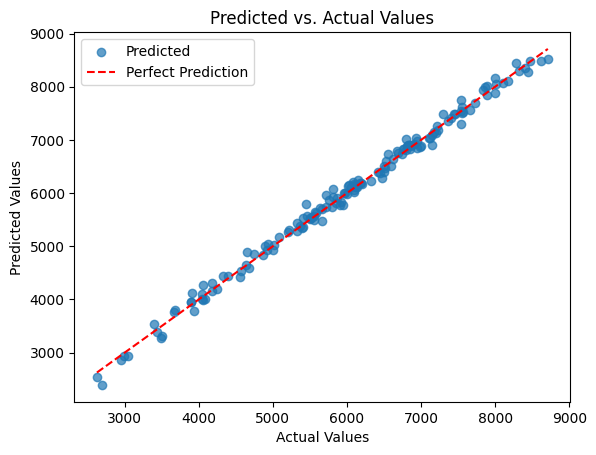

In [18]:
# Plotting the linear regression line
plt.scatter(Y_test, yPredRegLR, alpha=0.7, label='Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()